In [1]:
import sys
sys.path.append('../../Classes')
from DataHandler import DataHandler
from NNModelTrainer import NNModelTrainer
from NNModelTester import NNModelTester

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle

In [2]:
data = DataHandler(validation_sample= True, features_txt= 'all_features.txt')
data.main()

trainer = NNModelTrainer(data = data, name = 'all_features')
trainer.load_model()

tester = NNModelTester(model= trainer.model, data= data, name= 'test')
tester.predict()

Training: 224399 members, 469500 non members
Validation: 67319 members, 140850 non members
Testing: 28852 members, 60368 non members
----------------------------------------------------------------------


### First test

In [22]:
def permutation(feature: str, model_, data: DataHandler): 
    
    # baseline metric
    tester = NNModelTester(model= model_, data= data, name= '')
    tester.predict()
    base = tester.pr_auc
    
    # permute 
    news = []
    dat = data.copy()   
    for i in range(3):
        shuffled = shuffle(dat.testing[feature].values, random_state= 42)
        dat.testing[feature] = shuffled

        test = NNModelTester(model= model_, data= dat, name= '')
        test.data = dat
        test.predict()
        news.append(test.pr_auc)

    return base - np.mean(news)

permutation('gr', trainer.model, data)

c:\Users\Gimena\Documents\GIMENA\Trabajo-licenciatura\Cluster-Membership\NN\NOTEBOOKS\../../Classes\ModelTester.py:95: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * self.prec * self.rec) / (self.prec + self.rec)


0.07661211801063517

### With class

In [4]:
tester.plot_importances(kind = 'testing')

#### Combined gini + permutation

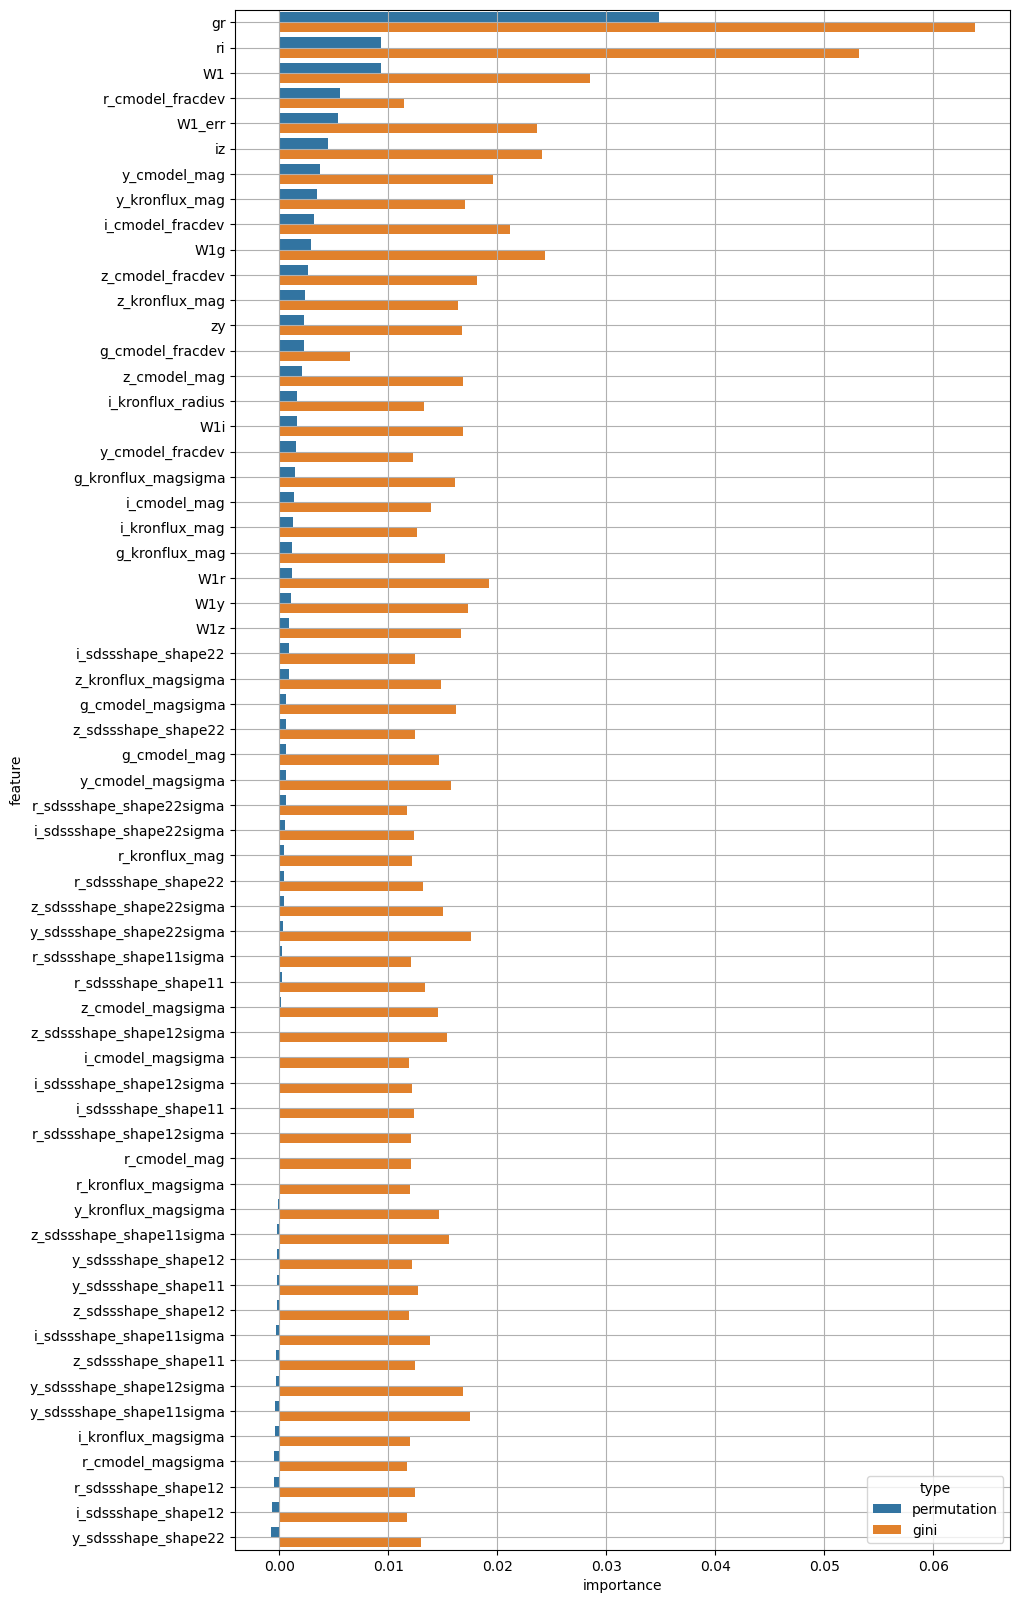

In [19]:
plt.figure(figsize= (10, 20))

gini = trainer.model.feature_importances_
perm = pi['average_precision'].importances_mean
importances = pd.DataFrame(dict(permutation = perm, gini = gini, feature = data.features))
importances = importances.sort_values(by = 'permutation', ascending= False)
importances = pd.melt(importances, var_name="type", value_name="importance", id_vars= 'feature')

sns.barplot(data = importances, x = 'importance', y = 'feature', hue = 'type', orient = 'h')
plt.grid()
plt.show()     

In [18]:
len(data.features)

61